#**Aula 1: Preparando os dados**

##**Carregando os documentos**

In [ ]:
# Instalando a biblioteca LlamaIndex
!pip install -q llama-index

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 22.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.0/253.0 kB 15.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 300.7/300.7 kB 18.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 32.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 3.0 MB/s eta 0:00:00


In [ ]:
# Importando a classe que permite carregar documentos de um diretório
from llama_index.core import SimpleDirectoryReader

In [ ]:
# Criando uma instância do SimpleDirectoryReader para carregar documentos do diretório 'documentos'
documentos = SimpleDirectoryReader(input_dir='documentos')

Acessando os arquivos carregados pelo SimpleDirectoryReader no diretório especificado:

In [ ]:
documentos.input_files

[PosixPath('/content/documentos/serenatto_cafes_especiais.pdf')]

Carregando o documento:

In [ ]:
docs = documentos.load_data()

Checando o conteúdo do documento:

In [ ]:
docs

[Document(id_='23d1536a-08af-46ba-82c0-c565f1d3a838', embedding=None, metadata={'page_label': '1', 'file_name': 'serenatto_cafes_especiais.pdf', 'file_path': '/content/documentos/serenatto_cafes_especiais.pdf', 'file_type': 'application/pdf', 'file_size': 133957, 'creation_date': '2025-02-17', 'last_modified_date': '2025-02-17'}, excluded_embed_metadata_keys=['file_name', 'file_type', 'file_size', 'creation_date', 'last_modified_date', 'last_accessed_date'], excluded_llm_metadata_keys=['file_name', 'file_type', 'file_size', 'creation_date', 'last_modified_date', 'last_accessed_date'], relationships={}, metadata_template='{key}: {value}', metadata_separator='\n', text_resource=MediaResource(embeddings=None, data=None, text='Serenatto  –  Loja  online  de  cafés  especiais   Informações  gerais   P:  Quais  produtos  são  vendidos  no  site  da  Serenatto?  R:  A  Serenatto  é  uma  loja  online  especializada  na  venda  de  grãos  de  cafés  especiais,  \noferecendo\n \ngrãos\n \ntorra

Conferindo a quantidade de páginas do PDF:

In [ ]:
len(docs)

10

Exibindo os metadados da primeira página:

In [ ]:
print(docs[0].get_metadata_str())

page_label: 1
file_name: serenatto_cafes_especiais.pdf
file_path: /content/documentos/serenatto_cafes_especiais.pdf
file_type: application/pdf
file_size: 133957
creation_date: 2025-02-17
last_modified_date: 2025-02-17


Acessando um dicionário com detalhes da primeira página:

In [ ]:
docs[0].__dict__

{'id_': '23d1536a-08af-46ba-82c0-c565f1d3a838',
 'embedding': None,
 'metadata': {'page_label': '1',
  'file_name': 'serenatto_cafes_especiais.pdf',
  'file_path': '/content/documentos/serenatto_cafes_especiais.pdf',
  'file_type': 'application/pdf',
  'file_size': 133957,
  'creation_date': '2025-02-17',
  'last_modified_date': '2025-02-17'},
 'excluded_embed_metadata_keys': ['file_name',
  'file_type',
  'file_size',
  'creation_date',
  'last_modified_date',
  'last_accessed_date'],
 'excluded_llm_metadata_keys': ['file_name',
  'file_type',
  'file_size',
  'creation_date',
  'last_modified_date',
  'last_accessed_date'],
 'relationships': {},
 'metadata_template': '{key}: {value}',
 'metadata_separator': '\n',
 'text_resource': MediaResource(embeddings=None, data=None, text='Serenatto  –  Loja  online  de  cafés  especiais   Informações  gerais   P:  Quais  produtos  são  vendidos  no  site  da  Serenatto?  R:  A  Serenatto  é  uma  loja  online  especializada  na  venda  de  grão

##**Organizando os documentos em partes menores**

Utilizando a classe `SentenceSplitter` para dividir o documento em partes (nós), de acordo com o `chunk_size`:

In [ ]:
from llama_index.core.node_parser import SentenceSplitter

node_parser = SentenceSplitter(chunk_size=1200)

In [ ]:
nodes  = node_parser.get_nodes_from_documents(docs, show_progress=True)

Parsing nodes:   0%|          | 0/10 [00:00<?, ?it/s]

Exibindo a quantidade de nós gerados:

In [ ]:
len(nodes)

10

Checando o conteúdo do primeiro nó:

In [ ]:
nodes[0]

TextNode(id_='32d5ba7b-2aa6-4a37-8ff2-f70dcd2bed68', embedding=None, metadata={'page_label': '1', 'file_name': 'serenatto_cafes_especiais.pdf', 'file_path': '/content/documentos/serenatto_cafes_especiais.pdf', 'file_type': 'application/pdf', 'file_size': 133957, 'creation_date': '2025-02-17', 'last_modified_date': '2025-02-17'}, excluded_embed_metadata_keys=['file_name', 'file_type', 'file_size', 'creation_date', 'last_modified_date', 'last_accessed_date'], excluded_llm_metadata_keys=['file_name', 'file_type', 'file_size', 'creation_date', 'last_modified_date', 'last_accessed_date'], relationships={<NodeRelationship.SOURCE: '1'>: RelatedNodeInfo(node_id='23d1536a-08af-46ba-82c0-c565f1d3a838', node_type=<ObjectType.DOCUMENT: '4'>, metadata={'page_label': '1', 'file_name': 'serenatto_cafes_especiais.pdf', 'file_path': '/content/documentos/serenatto_cafes_especiais.pdf', 'file_type': 'application/pdf', 'file_size': 133957, 'creation_date': '2025-02-17', 'last_modified_date': '2025-02-17'}

Checando o conteúdo do último nó:

In [ ]:
nodes[9]

TextNode(id_='afbf4889-e463-431e-8a07-81fe13916973', embedding=None, metadata={'page_label': '10', 'file_name': 'serenatto_cafes_especiais.pdf', 'file_path': '/content/documentos/serenatto_cafes_especiais.pdf', 'file_type': 'application/pdf', 'file_size': 133957, 'creation_date': '2025-02-17', 'last_modified_date': '2025-02-17'}, excluded_embed_metadata_keys=['file_name', 'file_type', 'file_size', 'creation_date', 'last_modified_date', 'last_accessed_date'], excluded_llm_metadata_keys=['file_name', 'file_type', 'file_size', 'creation_date', 'last_modified_date', 'last_accessed_date'], relationships={<NodeRelationship.SOURCE: '1'>: RelatedNodeInfo(node_id='0cdb38d7-6c56-4b67-9a3d-607e93e8a328', node_type=<ObjectType.DOCUMENT: '4'>, metadata={'page_label': '10', 'file_name': 'serenatto_cafes_especiais.pdf', 'file_path': '/content/documentos/serenatto_cafes_especiais.pdf', 'file_type': 'application/pdf', 'file_size': 133957, 'creation_date': '2025-02-17', 'last_modified_date': '2025-02-17

#**Aula 2: Criando a base de dados vetorial**

##**Criando o banco de dados local**

In [ ]:
# Instalando o pacote para utilizar modelos de embedding da Hugging Face com o LlamaIndex
!pip install -q llama-index-embeddings-huggingface

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 61.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 32.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 31.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 83.1 MB/s eta 0:00:00


In [ ]:
# Importando a classe HuggingFaceEmbedding para utilizar modelos de embedding da Hugging Face no LlamaIndex
from llama_index.embeddings.huggingface import HuggingFaceEmbedding

In [ ]:
# Classe personalizada para adaptar a assinatura esperada pelo Chroma
class ChromaEmbeddingWrapper:
    def __init__(self, model_name): # Inicializa o modelo de embeddings do Hugging Face com o nome especificado
        self.model = HuggingFaceEmbedding(model_name=model_name)

    def __call__(self, input): # Converte a entrada para um formato compatível com o HuggingFaceEmbedding
        return self.model.embed(input)

In [ ]:
# Definindo o modelo de embedding usado pelo chroma
embed_model_chroma = ChromaEmbeddingWrapper(model_name='intfloat/multilingual-e5-large')

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/387 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/160k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/57.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/690 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.24G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/418 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.1M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/280 [00:00<?, ?B/s]

1_Pooling%2Fconfig.json:   0%|          | 0.00/201 [00:00<?, ?B/s]

In [ ]:
# Instalando o pacote para integrar o Chroma como um armazenamento de vetores no LlamaIndex
!pip install -q llama-index-vector-stores-chroma

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 3.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.1/611.1 kB 16.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 61.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.6/278.6 kB 19.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.8/94.8 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 66.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.6/101.6 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 71.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.9/55.9 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.4/177.4 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 4.3 MB/s eta 0:00

In [ ]:
# Importando o ChromaDB
import chromadb

# Criando um cliente persistente do ChromaDB, armazenando os dados no diretório './chroma_db'
db = chromadb.PersistentClient(path='./chroma_db')

# Atribuindo o cliente a uma variável para uso posterior
chroma_client = db

# Definindo o nome da coleção que será criada
collection_name = 'documentos_serenatto'

# Tenta obter uma coleção existente ou criar uma nova, caso não exista
try:
  chroma_collection = chroma_client.get_or_create_collection(
      name = collection_name,
      embedding_function = embed_model_chroma
  )

# Captura e exibe qualquer erro que ocorra durante a criação ou carregamento da coleção
except Exception as e:
  print(f'Erro ao carregar ou criar coleção: {e}')

##**Armazenando os embeddings no banco de dados**

In [ ]:
# Importando a classe para integrar o Chroma como um armazenamento de vetores no LlamaIndex
from llama_index.vector_stores.chroma import ChromaVectorStore

# Importando a classe que gerencia o armazenamento de índices e vetores
from llama_index.core import StorageContext

In [ ]:
# Criando uma instância do ChromaVectorStore para armazenamento de vetores
vector_store = ChromaVectorStore(chroma_collection=chroma_collection)

# Configurando um contexto de armazenamento com o vector_store como armazenamento de vetores
storage_context = StorageContext.from_defaults(vector_store=vector_store)

In [ ]:
# Definindo o modelo de embedding
embed_model = HuggingFaceEmbedding(model_name='intfloat/multilingual-e5-large')

In [ ]:
# Importando a classe VectorStoreIndex do LlamaIndex, que permite criar um índice de armazenamento de vetores
from llama_index.core import VectorStoreIndex

# Criando um índice de armazenamento de vetores
index = VectorStoreIndex(nodes, storage_context=storage_context, embed_model=embed_model)

In [ ]:
# Importando a função do LlamaIndex, que permite carregar um índice previamente salvo
from llama_index.core import load_index_from_storage

# Carregando um índice existente a partir do contexto de armazenamento
index = load_index_from_storage(storage_context, embed_model=embed_model)

#**Aula 3: Recuperando as informações**

##**Consultando informações**

In [ ]:
# Recuperando a chave da API da Groq armazenada nos segredos do usuário no Google Colab
from google.colab import userdata
GROQ_API = userdata.get('GROQ_API')

In [ ]:
# Instalando o pacote `llama-index-llms-groq` para integrar o Groq com o LlamaIndex
!pip install -q llama-index-llms-groq

In [ ]:
# Importando a classe Groq para utilizar o modelo de linguagem da Groq
from llama_index.llms.groq import Groq

# Criando uma instância do Groq com o modelo 'llama3-70b-8192' e a chave de API fornecida
llm = Groq(model='llama3-70b-8192', api_key=GROQ_API)

Utilizando o `as_query_engine` para recuperar as duas informações mais relevantes:

> Você pode consultar a documentação da biblioteca LlamIndex sobre o *Query Engine* [aqui](https://docs.llamaindex.ai/en/stable/module_guides/deploying/query_engine/).

In [ ]:
# Configura o `query_engine` a partir do index
query_engine = index.as_query_engine(llm=llm, similarity_top_k=2)

Testando a recuperação de informações:

In [ ]:
query_engine.query('Quais grãos estão disponíveis?')

Response(response='Trabalhamos com as seguintes variedades de café em grãos: Bourbon vermelho, Bourbon amarelo, Blend especial (Mistura de Bourbon amarelo e vermelho), Catuaí amarelo, Geisha, Yirgacheffe.', source_nodes=[NodeWithScore(node=TextNode(id_='32d5ba7b-2aa6-4a37-8ff2-f70dcd2bed68', embedding=None, metadata={'page_label': '1', 'file_name': 'serenatto_cafes_especiais.pdf', 'file_path': '/content/documentos/serenatto_cafes_especiais.pdf', 'file_type': 'application/pdf', 'file_size': 133957, 'creation_date': '2025-02-17', 'last_modified_date': '2025-02-17'}, excluded_embed_metadata_keys=['file_name', 'file_type', 'file_size', 'creation_date', 'last_modified_date', 'last_accessed_date'], excluded_llm_metadata_keys=['file_name', 'file_type', 'file_size', 'creation_date', 'last_modified_date', 'last_accessed_date'], relationships={<NodeRelationship.SOURCE: '1'>: RelatedNodeInfo(node_id='23d1536a-08af-46ba-82c0-c565f1d3a838', node_type='4', metadata={'page_label': '1', 'file_name': '

Exibindo apenas a resposta:

In [ ]:
query_engine.query('Quais grãos estão disponíveis?').response

'Trabalhamos com as seguintes variedades de café em grãos: Bourbon vermelho, Bourbon amarelo, Blend especial (Mistura de Bourbon amarelo e vermelho), Catuaí amarelo, Geisha, Yirgacheffe.'

Entendendo o que acontece por trás dos panos:

In [ ]:
# Gerando um embedding vetorial para a consulta "Quais grãos estão disponíveis?"
query_embedding = embed_model.get_text_embedding('Quais grãos estão disponíveis?')

In [ ]:
# Realizando uma consulta na coleção Chroma usando o embedding gerado, solicitando os 2 resultados mais relevantes
# e incluindo as distâncias e embeddings dos itens retornados
chroma_collection.query(query_embedding, n_results=2, include=['distances','embeddings'])

{'ids': [['32d5ba7b-2aa6-4a37-8ff2-f70dcd2bed68',
   'fca20521-8ead-4da5-9617-42d522d2d4b3']],
 'embeddings': [array([[ 0.01460024, -0.01119941, -0.00576889, ...,  0.00555894,
          -0.0503395 ,  0.00342874],
         [ 0.01088387, -0.00235079,  0.00789606, ..., -0.00791937,
          -0.05915898,  0.00215074]])],
 'documents': None,
 'uris': None,
 'data': None,
 'metadatas': None,
 'distances': [[0.3552432626974375, 0.37550801512268867]],
 'included': [<IncludeEnum.embeddings: 'embeddings'>,
  <IncludeEnum.distances: 'distances'>]}

##**Conversando interativamente**

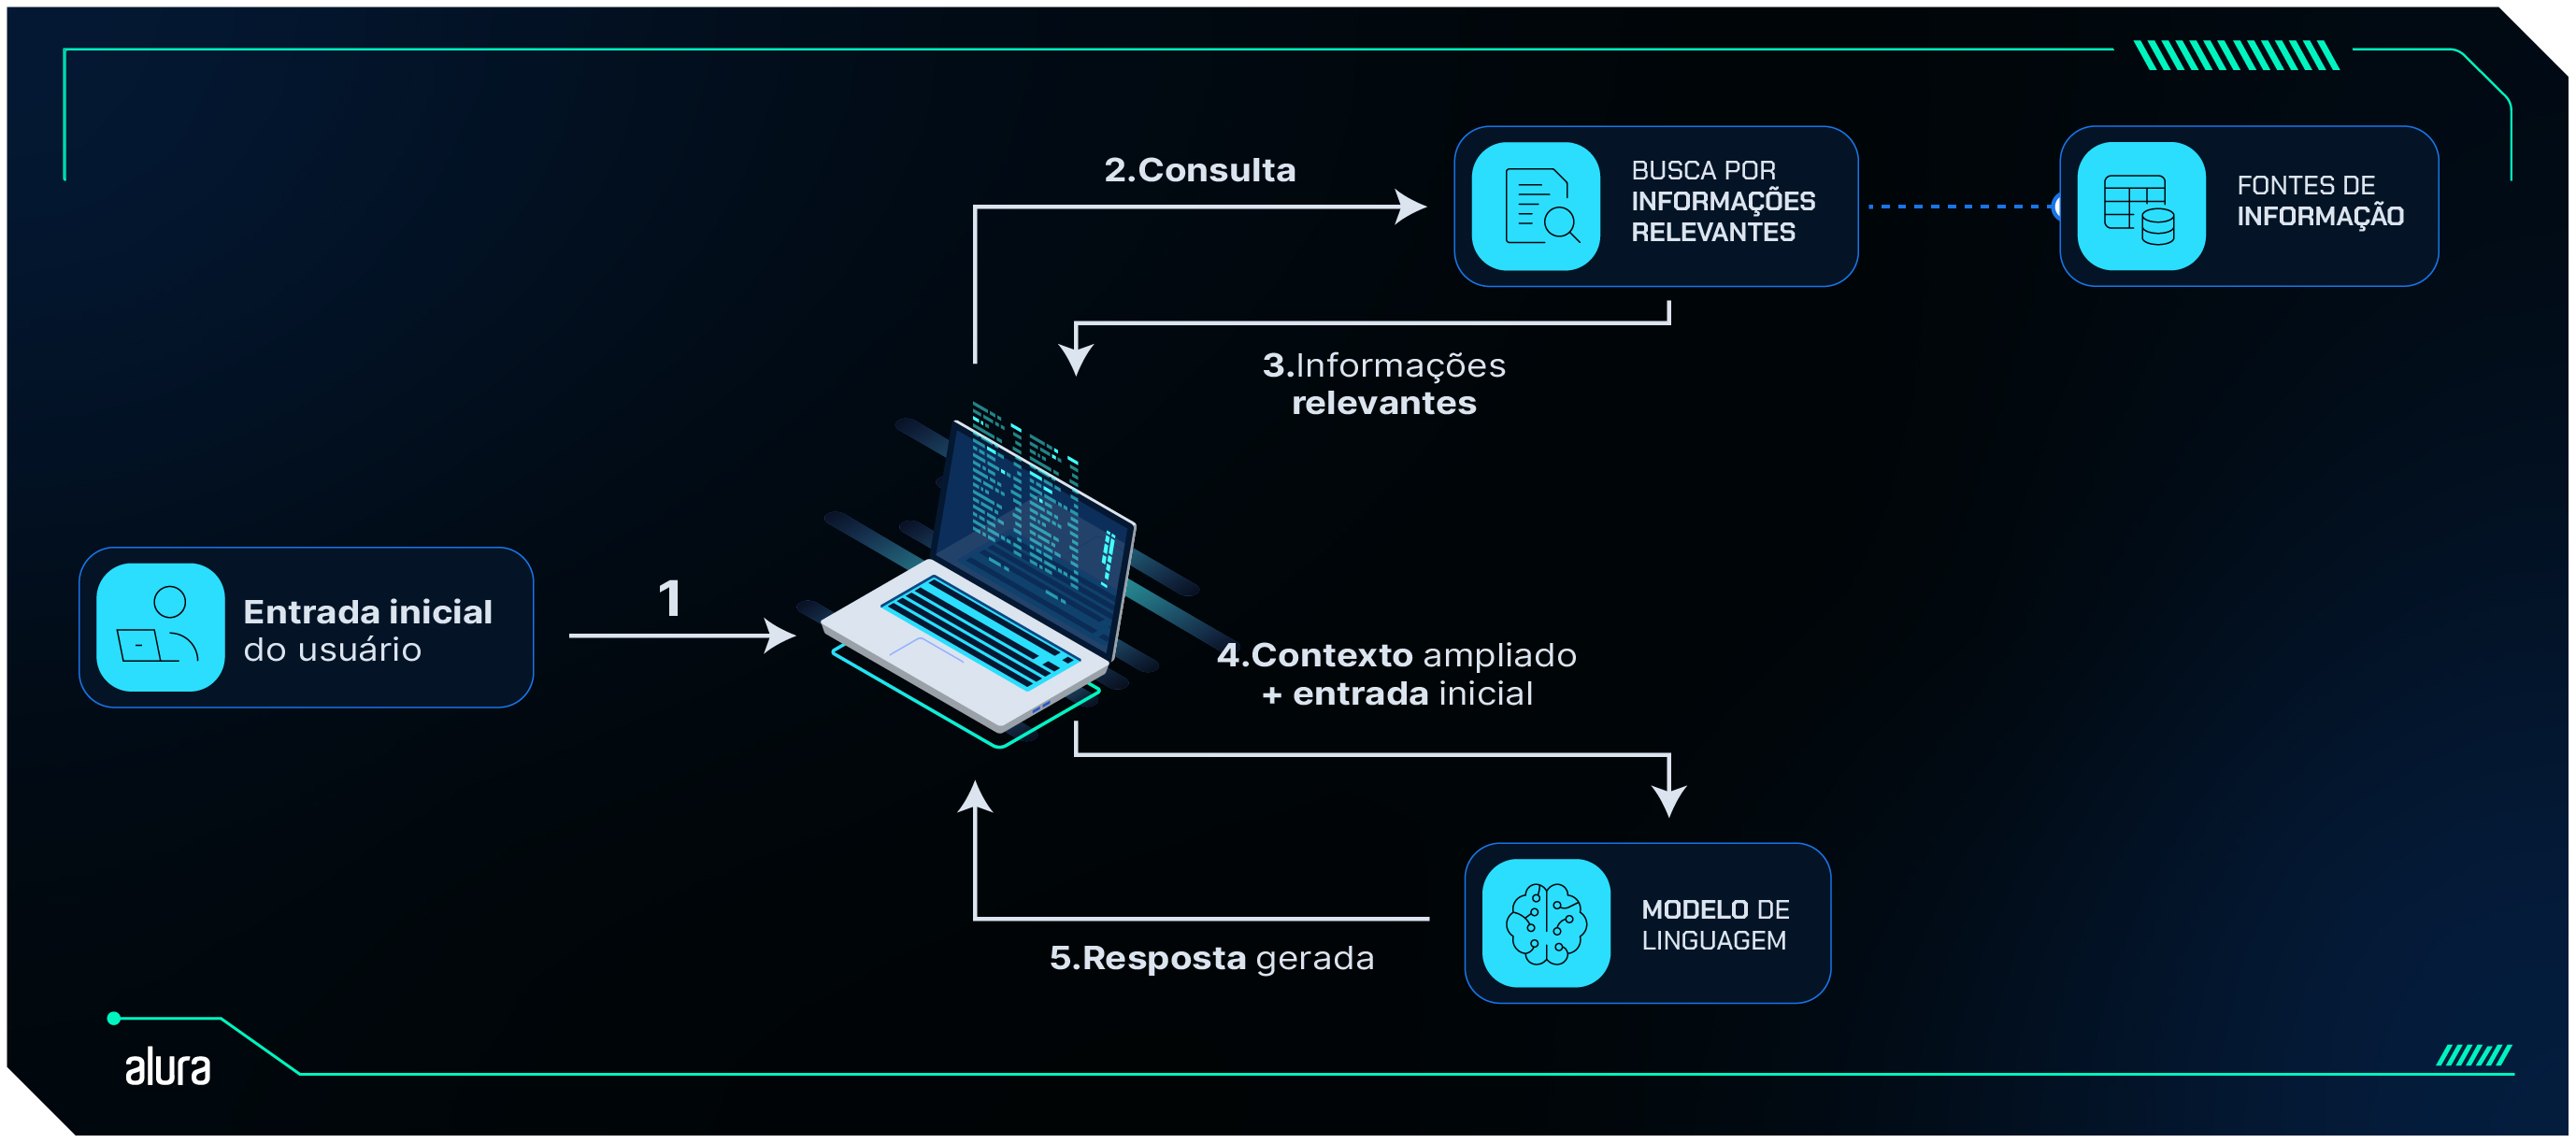

Você pode consultar a documentação da biblioteca LlamIndex sobre o *Chat Engine* [aqui](https://docs.llamaindex.ai/en/stable/module_guides/deploying/chat_engines/).

In [ ]:
chat_engine = index.as_chat_engine(mode='context', llm=llm)

Interagindo com o `chat_engine`

In [ ]:
pergunta = chat_engine.chat('Quais grãos estão disponíveis?').response
print(pergunta)

Os grãos disponíveis são Bourbon vermelho, Bourbon amarelo, Blend especial (Mistura de Bourbon amarelo e vermelho), Catuaí amarelo, Geisha e Yirgacheffe.


In [ ]:
pergunta = chat_engine.chat('Quais são os preços dos grãos?').response
print(pergunta)

Os preços dos grãos são: Bourbon vermelho: R$ 41,00, Bourbon amarelo: R$ 43,00, Blend especial: R$ 37,50, Catuaí amarelo: R$ 55,00, Geisha: R$ 105,00, e Yirgacheffe: R$ 110,00.


In [ ]:
pergunta = chat_engine.chat('Você pode me dar mais detalhes sobre o cataui amarelo?').response
print(pergunta)

O Catuaí amarelo tem uma doçura máxima (5/5), um corpo médio-alto (4/5) e uma amargura baixa (1/5). Além disso, apresenta uma acidez expressiva e notas incríveis de pitanga, tornando-o uma experiência de café única e diferenciada.


Verificando se o `chat_engine` está armazenando memória durante a conversa:

In [ ]:
pergunta = chat_engine.chat('Qual é o preço dele?').response
print(pergunta)

O preço do Catuaí amarelo é R$ 55,00.


Analisando o histórico de mensagens:

In [ ]:
chat_engine.chat_history

[ChatMessage(role=<MessageRole.USER: 'user'>, additional_kwargs={}, blocks=[TextBlock(block_type='text', text='Quais grãos estão disponíveis?')]),
 ChatMessage(role=<MessageRole.ASSISTANT: 'assistant'>, additional_kwargs={}, blocks=[TextBlock(block_type='text', text='Os grãos disponíveis são Bourbon vermelho, Bourbon amarelo, Blend especial (Mistura de Bourbon amarelo e vermelho), Catuaí amarelo, Geisha e Yirgacheffe.')]),
 ChatMessage(role=<MessageRole.USER: 'user'>, additional_kwargs={}, blocks=[TextBlock(block_type='text', text='Quais são os preços dos grãos?')]),
 ChatMessage(role=<MessageRole.ASSISTANT: 'assistant'>, additional_kwargs={}, blocks=[TextBlock(block_type='text', text='Os preços dos grãos são: Bourbon vermelho: R$ 41,00, Bourbon amarelo: R$ 43,00, Blend especial: R$ 37,50, Catuaí amarelo: R$ 55,00, Geisha: R$ 105,00, e Yirgacheffe: R$ 110,00.')]),
 ChatMessage(role=<MessageRole.USER: 'user'>, additional_kwargs={}, blocks=[TextBlock(block_type='text', text='Quais são os

##**Gerenciando o histórico de mensagens**

Você pode consultar a documentação da biblioteca LlamIndex sobre o `ChatSummaryMemoryBuffer` [aqui](https://docs.llamaindex.ai/en/stable/examples/memory/ChatSummaryMemoryBuffer/).

In [ ]:
# Importando o ChatSummaryMemoryBuffer para gerenciar a memória
from llama_index.core.memory import ChatSummaryMemoryBuffer

In [ ]:
# Definindo como a memória será gerenciada
memory = ChatSummaryMemoryBuffer(llm=llm, token_limit=256)

In [ ]:
# Configurando o chat_engine, adicionando memory e system_prompt
chat_engine = index.as_chat_engine(
    chat_mode='context',
    llm=llm,
    memory=memory,
    system_prompt=('''Você é especialista em cafés especiais da Serenatto, uma loja online que vende grãos de cafés torrados.
       Sua função é tirar dúvidas de forma simpática e natural sobre os grãos disponíveis''')
)

Interagindo com o `chat_engine`, que agora inclui gerenciamento de memória com `ChatSummaryMemoryBuffer` e a integração de um `system_prompt` para melhorar a experiência de conversa:

In [ ]:
response = chat_engine.chat('Olá')
print(response)

Olá de novo! Estou aqui para ajudar. Você parece estar curioso sobre nossos cafés especiais. Quer saber mais sobre nossas opções de cafés, como o Geisha ou o Yirgacheffe? Ou talvez você queira saber mais sobre como podemos enviar nossos cafés para você? Ou quem sabe você tem alguma dúvida sobre como preparar o café perfeito?


In [ ]:
response = chat_engine.chat('Você pode me dar mais detalhes sobre o catuai amarelo?')
print(response)

O Catuaí Amarelo! É um dos nossos cafés mais especiais. Ele tem um perfil sensorial exótico, com uma acidez vibrante e notas de pitanga e acerola. É um café para quem busca uma experiência sensorial diferenciada.

Além disso, o Catuaí Amarelo tem uma doçura máxima (5/5) e um corpo médio-alto (4/5), com um amargor baixo (1/5). O processo de produção é fermentado, cultivado em altitude de 1.200m, com torra média.

Ele é um café que foge do tradicional, com um sabor residual longo e intenso. Se você está procurando por um café que seja diferente de tudo que você já provou, o Catuaí Amarelo é uma ótima escolha!


In [ ]:
response = chat_engine.chat('Qual é o preço dele?')
print(response)

O preço do Catuaí Amarelo é de R$ 55,00 por pacote de 250g. É um investimento vale a pena para quem busca uma experiência sensorial única e de alta qualidade!


Analisando como a memória está sendo armazenada com `ChatSummaryMemoryBuffer`:

In [ ]:
memory.get()

[ChatMessage(role=<MessageRole.SYSTEM: 'system'>, additional_kwargs={}, blocks=[TextBlock(block_type='text', text="It seems like the user has finally shown interest in one of the coffee shop's special coffees, specifically the Catuaí Amarelo. The assistant is providing detailed information about the coffee, including its sensory profile, acidity, sweetness, body, and bitterness. The assistant is also highlighting the coffee's unique characteristics, such as its fermented production process and high-altitude cultivation.\n\nThe assistant's response is enthusiastic and encouraging, inviting the user to try the Catuaí Amarelo if they're looking for a unique coffee experience. The tone is informative, yet promotional, as the assistant is trying to persuade the user to try this particular coffee.")]),
 ChatMessage(role=<MessageRole.USER: 'user'>, additional_kwargs={}, blocks=[TextBlock(block_type='text', text='Qual é o preço dele?')]),
 ChatMessage(role=<MessageRole.ASSISTANT: 'assistant'>,

Resetando o `chat_engine`:

In [ ]:
chat_engine.reset()

Fazendo uma pergunta após resetar o `chat_engine`:

In [ ]:
response = chat_engine.chat('Qual é o preço dele?')
print(response)

Olá!

Os preços dos nossos cafés especiais variam de acordo com a variedade. Aqui vão os preços atuais:

* Bourbon Vermelho: R$ 41,00
* Bourbon Amarelo: R$ 43,00
* Blend Especial (mistura de Bourbon Amarelo e Vermelho): R$ 37,50
* Catuaí Amarelo: R$ 55,00
* Geisha: R$ 105,00
* Yirgacheffe: R$ 110,00

Todos os nossos cafés são vendidos em pacotes de 250g. Se tiver alguma dúvida adicional, sinta-se à vontade para perguntar!


##**Criando uma interface com Gradio**

In [ ]:
# Instalando a biblioteca gradio
!pip install -q gradio

In [ ]:
# Importando a biblioteca gradio
import gradio as gr

In [ ]:
# Criando a função para conversar com o chatbot
def converse_com_bot(message, chat_history):
    response = chat_engine.chat(message)

    if chat_history is None:
        chat_history = []

    chat_history.append({"role": "user", "content": message})
    chat_history.append({"role": "assistant", "content": response.response})

    return "", chat_history

# Criando a função para resetar o chatbot
def resetar_chat():
  chat_engine.reset()
  return []

In [ ]:
# Criando a interface com gradio
with gr.Blocks() as demo:

  # Adiciona um título na interface usando Markdown
  gr.Markdown('# Chatbot da Serenatto')

  # Cria um componente de Chatbot para exibir as mensagens trocadas
  chatbot = gr.Chatbot(type='messages')

  # Cria uma caixa de texto para o usuário digitar a mensagem
  msg = gr.Textbox(label='Digite a sua mensagem')

  # Cria um botão para limpar o chat
  limpar = gr.Button('Limpar')

  # Define a ação quando o usuário envia uma mensagem
  msg.submit(converse_com_bot, [msg, chatbot], [msg, chatbot])

  # Define a ação quando o botão "Limpar" é clicado
  limpar.click(resetar_chat, None, chatbot, queue=False)

# Inicia a interface do Gradio em modo de depuração
demo.launch(debug=True)